# DESCRIPCIÓN DEL PROBLEMA Y ANÁLISIS EXPLORATORIO DE DATOS

## IDENTIFICACIÓN DEL PROBLEMA Y OBJETIVO DEL TRABAJO


Nos encontramos ante un conjunto de datos llamado "Base.csv". Uno de los 6 datasets que componen el Bank Account Fraud (BAF). Este contiene conjuntos de datos tabulares de fraude en cuentas bancarias. 

Se trata de datos sintéticos, por lo que no contienen información real.

En cuanto a su dimensión, contiene un millón de instancias y 32 atributos.

El objetivo por tanto de este trabajo es elaborar un modelo de clasificación capaz de predecir la detección de fraude a través de los datos de Base. Para ello, llevaremos a cabo el siguiente proceso:
- EDA
- Procesamiento de datos
- Selección de características
- Ingeniería de características
- Elaboración del modelo base
- Elaboración de los distintos modelos (de entre los que dediremos cuál es el que tiene un mayor poder predictivo)
- Optimización de hiperparámetros
- Evaluación del modelo.
- Explicabilidad

### OBJETIVO DEL EDA (Explotatory Data Analysis)

El objetivo del Análisis Exploratorio de Datos (EDA) es obtener una comprensión profunda y completa de la **estructura, patrones y características** clave de un conjunto de datos.

En este cuaderno, realizaremos el EDA con el objetivo de conocer:
- Tamaño y formato de los datos
- Análisis de correlaciones
- Análisis de valores missing
- Análisis de valores extremos

In [130]:
#Importación de las librerías necesarias
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
import plotly.express as px
from scipy.stats import chi2_contingency


pd.set_option('display.max_columns', 500)
pd.set_option('display.max_rows', 5000)

In [67]:
#Leemos los datos
Base_df = pd.read_csv('../data/Base.csv')
Base_df

fraud_bool  income  name_email_similarity  prev_address_months_count  \
0                1     0.9               0.166828                         -1   
1                1     0.9               0.296286                         -1   
2                1     0.9               0.044985                         -1   
3                1     0.9               0.159511                         -1   
4                1     0.9               0.596414                         -1   
...            ...     ...                    ...                        ...   
999995           0     0.6               0.192631                         -1   
999996           0     0.8               0.322989                        148   
999997           0     0.8               0.879403                         -1   
999998           0     0.9               0.762112                         -1   
999999           0     0.2               0.697452                         -1   

        current_address_months_count  customer_age  days_since_request  \
0                                 88            50            0.020925   
1                                144            50            0.005418   
2                                132            40            3.108549   
3                                 22            50            0.019079   
4                                218            50            0.004441   
...                              ...           ...                 ...   
999995                           104            40            0.030592   
999996                             9            50            1.628119   
999997                            30            20            0.018563   
999998                           189            20            0.015352   
999999                           321            20            2.655916   

        intended_balcon_amount payment_type  zip_count_4w   velocity_6h  \
0                    -1.331345           AA           769  10650.765523   
1                    -0.816224           AB           366    534.047319   
2                    -0.755728           AC           870   4048.534263   
3                    -1.205124           AB           810   3457.064063   
4                    -0.773276           AB           890   5020.341679   
...                        ...          ...           ...           ...   
999995               -1.044454           AB           804   7905.711839   
999996               -1.409803           AC          3306   5391.470463   
999997               34.692760           AA          1522   8063.102636   
999998               94.661055           AA          1418   8092.641762   
999999                9.908499           AA           951   6169.630036   

        velocity_24h  velocity_4w  bank_branch_count_8w  \
0        3134.319630  3863.647740                     1   
1        2670.918292  3124.298166                   718   
2        2893.621498  3159.590679                     1   
3        4054.908412  3022.261812                  1921   
4        2728.237159  3087.670952                  1990   
...              ...          ...                   ...   
999995   8341.468557  4972.635997                     1   
999996   4955.170808  5022.728108                     0   
999997   5670.654316  4377.196321                  2023   
999998   3982.582204  4394.803296                  1678   
999999   3695.308261  4352.334543                     2   

        date_of_birth_distinct_emails_4w employment_status  credit_risk_score  \
0                                      6                CA                185   
1                                      3                CA                259   
2                                     14                CB                177   
3                                      6                CA                110   
4                                      2                CA                295   
...                                  ...               ...    

Como hemos explicado en la introducción del notebook, en el dataframe hay 1000000 filas y 32 columnas (variables).

In [68]:
#Eliminamos duplicados
print(Base_df.shape, Base_df.drop_duplicates().shape)

(1000000, 32) (1000000, 32)


Como vemos, las cifras se mantienen iguales por lo que no hay datos duplicados.

In [69]:
Base_df.dtypes.to_dict()

{'fraud_bool': dtype('int64'),
 'income': dtype('float64'),
 'name_email_similarity': dtype('float64'),
 'prev_address_months_count': dtype('int64'),
 'current_address_months_count': dtype('int64'),
 'customer_age': dtype('int64'),
 'days_since_request': dtype('float64'),
 'intended_balcon_amount': dtype('float64'),
 'payment_type': dtype('O'),
 'zip_count_4w': dtype('int64'),
 'velocity_6h': dtype('float64'),
 'velocity_24h': dtype('float64'),
 'velocity_4w': dtype('float64'),
 'bank_branch_count_8w': dtype('int64'),
 'date_of_birth_distinct_emails_4w': dtype('int64'),
 'employment_status': dtype('O'),
 'credit_risk_score': dtype('int64'),
 'email_is_free': dtype('int64'),
 'housing_status': dtype('O'),
 'phone_home_valid': dtype('int64'),
 'phone_mobile_valid': dtype('int64'),
 'bank_months_count': dtype('int64'),
 'has_other_cards': dtype('int64'),
 'proposed_credit_limit': dtype('float64'),
 'foreign_request': dtype('int64'),
 'source': dtype('O'),
 'session_length_in_minutes': dty

El dataset contiene datos tanto de formato numérico (discretos y continuos), como categórico.

### DISTRIBUCIÓN DEL FRAUDE

Vamos a establecer como variable objetivo la variable "fraud_bool", que identifica las aplicaciones de crédito bancarias fraudulentas con un 1 y las aplicaciones legítimas con un 0. Realizaremos un recuento para ver si predomina el fraude o no.

In [70]:
Base_df_plot_fraud_bool_status = Base_df['fraud_bool']\
        .value_counts(normalize=True)\
        .mul(100).rename('percent').reset_index()

Base_df_plot_fraud_bool_status_conteo = Base_df['fraud_bool'].value_counts().reset_index()
Base_df_plot_fraud_bool_status_pc = pd.merge(Base_df_plot_fraud_bool_status, Base_df_plot_fraud_bool_status_conteo, on=['fraud_bool'], how='inner')
Base_df_plot_fraud_bool_status_pc

fraud_bool  percent   count
0           0  98.8971  988971
1           1   1.1029   11029

Vemos que la existencia de fraude es prácticamente nula, con casi un 99% de ceros y aproximadamente un 1% de unos. Graficamos el recuento de valores. 

In [71]:
fig = px.histogram(Base_df_plot_fraud_bool_status_pc, x="fraud_bool", y=['percent'])
fig.show()

### Análisis de valores missing

In [100]:
base_series_null_columns = Base_df.isnull().sum().sort_values(ascending=False)
base_series_null_rows = Base_df.isnull().sum(axis=1).sort_values(ascending=False)
print(base_series_null_columns.shape, base_series_null_rows.shape)

base_null_columnas = pd.DataFrame(base_series_null_columns, columns=['nulos_columnas'])     
base_null_filas = pd.DataFrame(base_series_null_rows, columns=['nulos_filas'])  
base_null_filas['target'] = Base_df['fraud_bool'].copy()
base_null_columnas['porcentaje_columnas'] = base_null_columnas['nulos_columnas']/Base_df.shape[0]
base_null_filas['porcentaje_filas']= base_null_filas['nulos_filas']/Base_df.shape[1]

(32,) (1000000,)


En este dataset, cualquier función para detectar nulos no será eficaz ya que en este caso adquieren valores de -1 o negativos. Es decir, no podremos detectar los valores nulos de la manera habitual, ya que detecta NAs y en estos datos no hay. He aquí el ejemplo:

In [149]:
#Creamos lista con las variables numéricas
lista_variables_numericas = ["income", "name_email_similarity", "prev_address_months_count", "current_address_months_count", "customer_age", "days_since_request",
                            "intended_balcon_amount", "zip_count_4w", "velocity_6h", "velocity_24h", "velocity_4w", "bank_branch_count_8w", "date_of_birth_distinct_emails_4w",
                            "credit_risk_score", "bank_months_count", "proposed_credit_limit", "session_length_in_minutes", "device_distinct_emails_8w", "device_fraud_count",
                            "month"]


In [101]:
def get_percent_null_values_target(Base_df, list_var_continuous, target):

    base_df_final = pd.DataFrame()
    for i in list_var_continuous:
        if Base_df[i].isnull().sum()>0:
            base_concat_percent = pd.DataFrame(Base_df[target][Base_df[i].isnull()]\
                                            .value_counts(normalize=True).reset_index()).T
            base_concat_percent.columns = [base_concat_percent.iloc[0,0], 
                                         base_concat_percent.iloc[0,1]]
            base_concat_percent = base_concat_percent.drop('index',axis=0)
            base_concat_percent['variable'] = i
            base_concat_percent['sum_null_values'] = Base_df[i].isnull().sum()
            base_concat_percent['porcentaje_sum_null_values'] = Base_df[i].isnull().sum()/Base_df.shape[0]
            base_final = pd.concat([base_df_final, base_concat_percent], axis=0).reset_index(drop=True)
            
    if base_df_final.empty:
        print('No existen variables con valores nulos')
        
    return base_df_final

In [102]:
get_percent_null_values_target(Base_df, lista_variables_numericas, target='fraud_bool')

No existen variables con valores nulos


Empty DataFrame
Columns: []
Index: []

Este código nos ayuda a detectar valores nulos (NAs). Como nuestra base de datos detecta nulos en los valores negativos
y -1, nos resulta inútil. Para detectarlos, haremos lo siguiente:

In [103]:
import pandas as pd
import numpy as np

filtered_data = Base_df.copy()
columns_to_check = ['prev_address_months_count', 'current_address_months_count', 'bank_months_count', 'session_length_in_minutes', 'intended_balcon_amount']
null_values = filtered_data[columns_to_check].applymap(lambda x: 1 if pd.isnull(x) or x < 0 else 0).sum()
null_percentage = (null_values / len(Base_df)) * 100
base_null_columnas = pd.DataFrame({'nulos_columnas': null_values, 'porcentaje_columnas': null_percentage})
print(base_null_columnas)


/var/folders/1l/q9rgmm2d30j9k7npzfz8srnr0000gn/T/ipykernel_49621/2734634712.py:6: FutureWarning:

DataFrame.applymap has been deprecated. Use DataFrame.map instead.



                              nulos_columnas  porcentaje_columnas
prev_address_months_count             712920              71.2920
current_address_months_count            4254               0.4254
bank_months_count                     253635              25.3635
session_length_in_minutes               2015               0.2015
intended_balcon_amount                742523              74.2523


La cantidad de valores nulos que recogen las variables especificadas es bastante significativa. También debemos tener en cuenta
que el número de registros en el dataframe es muy elevado (de 1 millón). Simplemente, vamos a tener en cuenta
en el análisis y en las conclusiones que gran parte de los valores en estas variables son nulos. Pero por ahora no vamos a tratarlos

In [104]:
base_null_columnas

nulos_columnas  porcentaje_columnas
prev_address_months_count             712920              71.2920
current_address_months_count            4254               0.4254
bank_months_count                     253635              25.3635
session_length_in_minutes               2015               0.2015
intended_balcon_amount                742523              74.2523

A continuación, se define un umbral (threshold) con un valor de 0.9, lo que significa que se considerarán solo las columnas que tengan menos del 90% de valores nulos. Vemos como en vez de recoger 32 variables recoge 29, por lo que 3 de ellas están compuestas casi en su totalidad por valores nulos. 

In [106]:
threshold = 0.9
list_vars_null = list(base_null_columnas[base_null_columnas['porcentaje_columnas'] >= threshold].index)
print("Variables con más del 90% de valores nulos:")
print(list_vars_null)

Variables con más del 90% de valores nulos:
['prev_address_months_count', 'bank_months_count', 'intended_balcon_amount']


In [107]:
base_null_filas

nulos_filas  target  porcentaje_filas
0                 0       1               0.0
666657            0       0               0.0
666659            0       0               0.0
666660            0       0               0.0
666661            0       0               0.0
...             ...     ...               ...
333337            0       0               0.0
333338            0       0               0.0
333339            0       0               0.0
333340            0       0               0.0
999999            0       0               0.0

[1000000 rows x 3 columns]

### VARIABLES CATEGÓRICAS

In [108]:
def dame_variables_categoricas(dataset=None):
    '''
    ----------------------------------------------------------------------------------------------------------
    Función dame_variables_categoricas:
    ----------------------------------------------------------------------------------------------------------
        -Descripción: Función que recibe un dataset y devuelve una lista con los nombres de las 
        variables categóricas
        -Inputs: 
            -- dataset: Pandas dataframe que contiene los datos
        -Return:
            -- lista_variables_categoricas: lista con los nombres de las variables categóricas del
            dataset de entrada con menos de 100 valores diferentes
            -- 1: la ejecución es incorrecta
    '''
    if dataset is None:
        print(u'\nFaltan argumentos por pasar a la función')
        return 1
    lista_variables_categoricas = []
    other = []
    for i in dataset.columns:
        if (dataset[i].dtype!=float) & (dataset[i].dtype!=int):
            unicos = int(len(np.unique(dataset[i].dropna(axis=0, how='all'))))
            if unicos < 100:
                lista_variables_categoricas.append(i)
            else:
                other.append(i)

    return lista_variables_categoricas, other

In [109]:
list_cat_vars, other = dame_variables_categoricas(dataset = Base_df)
Base_df[list_cat_vars] = Base_df[list_cat_vars].astype("category")
Base_df[list_cat_vars].head()

payment_type employment_status housing_status    source  device_os
0           AA                CA             BA  INTERNET    windows
1           AB                CA             BA  INTERNET    windows
2           AC                CB             BA  INTERNET      other
3           AB                CA             BA  INTERNET      linux
4           AB                CA             BA  INTERNET  macintosh

Tenemos 5 variables categóricas de las 32 existentes

In [110]:
list_cat_vars

['payment_type', 'employment_status', 'housing_status', 'source', 'device_os']

In [111]:
Base_df[list_cat_vars].dtypes

payment_type         category
employment_status    category
housing_status       category
source               category
device_os            category
dtype: object

### FORMATO DE VARIABLES


- Para variables numericas: correlaciones de pearson, estudio de outliers y estudio de valores missing
- Para variables categoricas: relleno de valores missing, estudio de correlaciones con vCramer


Recogemos en una lista las variables categóricas y las cambiamos a tipo "category"

In [112]:
lista_variables_categoricas = variables_categoricas = ["payment_type","employment_status","housing_status","email_is_free","phone_home_valid",
                                "phone_mobile_valid","has_other_cards","foreign_request","source","device_os","keep_alive_session", "fraud_bool"]

In [113]:
for columna in variables_categoricas:
    Base_df[columna] = Base_df[columna].astype('category')   
lista_variables_categoricas

['payment_type',
 'employment_status',
 'housing_status',
 'email_is_free',
 'phone_home_valid',
 'phone_mobile_valid',
 'has_other_cards',
 'foreign_request',
 'source',
 'device_os',
 'keep_alive_session',
 'fraud_bool']

Pasamos las variables numéricas enteras "int" a "float" (formato decimal)

In [114]:
Base_df['prev_address_months_count'] = Base_df['prev_address_months_count'].astype(float)
Base_df['current_address_months_count'] = Base_df['current_address_months_count'].astype(float)
Base_df['zip_count_4w'] = Base_df['zip_count_4w'].astype(float)
Base_df['bank_branch_count_8w'] = Base_df['bank_branch_count_8w'].astype(float)
Base_df['credit_risk_score'] = Base_df['credit_risk_score'].astype(float)
Base_df['customer_age'] = Base_df['customer_age'].astype(float)
Base_df['date_of_birth_distinct_emails_4w'] = Base_df['date_of_birth_distinct_emails_4w'].astype(float)
Base_df['email_is_free'] = Base_df['email_is_free'].astype(float)
Base_df['phone_home_valid'] = Base_df['phone_home_valid'].astype(float)
Base_df['phone_mobile_valid'] = Base_df['phone_mobile_valid'].astype(float)
Base_df['bank_months_count'] = Base_df['bank_months_count'].astype(float)
Base_df['has_other_cards'] = Base_df['has_other_cards'].astype(float)
Base_df['foreign_request'] = Base_df['foreign_request'].astype(float)
Base_df['keep_alive_session'] = Base_df['keep_alive_session'].astype(float)
Base_df['device_distinct_emails_8w'] = Base_df['device_distinct_emails_8w'].astype(float)
Base_df['device_fraud_count'] = Base_df['device_fraud_count'].astype(float)

In [115]:
Base_df.dtypes

fraud_bool                          category
income                               float64
name_email_similarity                float64
prev_address_months_count            float64
current_address_months_count         float64
customer_age                         float64
days_since_request                   float64
intended_balcon_amount               float64
payment_type                        category
zip_count_4w                         float64
velocity_6h                          float64
velocity_24h                         float64
velocity_4w                          float64
bank_branch_count_8w                 float64
date_of_birth_distinct_emails_4w     float64
employment_status                   category
credit_risk_score                    float64
email_is_free                        float64
housing_status                      category
phone_home_valid                     float64
phone_mobile_valid                   float64
bank_months_count                    float64
has_other_

In [116]:

Base_df_plot_fraud_bool_status = Base_df['fraud_bool']\
        .value_counts(normalize=True)\
        .mul(100).rename('percent').reset_index()

Base_df_plot_fraud_bool_status_conteo = Base_df['fraud_bool'].value_counts().reset_index()
Base_df_plot_fraud_bool_status_pc = pd.merge(Base_df_plot_fraud_bool_status, 
                                  Base_df_plot_fraud_bool_status_conteo, on=['fraud_bool'], how='inner')

fig = px.histogram(Base_df_plot_fraud_bool_status_pc, x="fraud_bool", y=['percent'])
fig.show()

### VARIABLE OBJETIVO

Asignamos la variable 'fraud_bool' como variable objetivo para visualizar su distribución de cara al fraude.

In [118]:
target = 'fraud_bool'
Base_df[target] = Base_df[target].astype(str)

### Análisis de cada variable con gráficos descriptivos

In [119]:
def plot_feature(df, col_name, isContinuous, target):
    """
    Visualize a variable with and without faceting on the loan status.
    - df dataframe
    - col_name is the variable name in the dataframe
    - full_name is the full variable name
    - continuous is True if the variable is continuous, False otherwise
    """
    f, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(12,3), dpi=90)
    
    count_null = df[col_name].isnull().sum()
    if isContinuous:
        
        sns.histplot(df.loc[df[col_name].notnull(), col_name], kde=False, ax=ax1)
    else:
        sns.countplot(df, x=col_name, color='#5975A4', saturation=1, ax=ax1)
    ax1.set_xlabel(col_name)
    ax1.set_ylabel('Count')
    ax1.set_title(col_name+ ' Numero de nulos: '+str(count_null))
    plt.xticks(rotation = 90)


    if isContinuous:
        sns.boxplot(x=col_name, y=target, data=df, ax=ax2)
        ax2.set_ylabel('')
        ax2.set_title(col_name + ' by '+target)
    else:
        data = df.groupby(col_name)[target].value_counts(normalize=True).to_frame('proportion').reset_index() 
        data.columns = [i, target, 'proportion']
        #sns.barplot(x = col_name, y = 'proportion', hue= target, data = data, saturation=1, ax=ax2)
        sns.barplot(x = col_name, y = 'proportion', hue= target, data = data, saturation=1, ax=ax2)
        ax2.set_ylabel(target+' fraction')
        ax2.set_title(target)
        plt.xticks(rotation = 90)
    ax2.set_xlabel(col_name)
    
    plt.tight_layout()
    

/Users/ruthjorganestorres/anaconda3/envs/Practica_1/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning:

is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead

/Users/ruthjorganestorres/anaconda3/envs/Practica_1/lib/python3.9/site-packages/seaborn/_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.

/Users/ruthjorganestorres/anaconda3/envs/Practica_1/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning:

is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead

/Users/ruthjorganestorres/anaconda3/envs/Practica_1/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning:

is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead

/Users/r

/Users/ruthjorganestorres/anaconda3/envs/Practica_1/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning:

is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead

/Users/ruthjorganestorres/anaconda3/envs/Practica_1/lib/python3.9/site-packages/seaborn/categorical.py:641: FutureWarning:

The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.

/var/folders/1l/q9rgmm2d30j9k7npzfz8srnr0000gn/T/ipykernel_49621/3531263144.py:28: FutureWarning:

The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.

/Users/ruthjorganestorres/anaconda3/envs/Practica_1/lib/python3.9/site-packages/seabor

/Users/ruthjorganestorres/anaconda3/envs/Practica_1/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning:

is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead

/Users/ruthjorganestorres/anaconda3/envs/Practica_1/lib/python3.9/site-packages/seaborn/_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.

/Users/ruthjorganestorres/anaconda3/envs/Practica_1/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning:

is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead

/Users/ruthjorganestorres/anaconda3/envs/Practica_1/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning:

is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead

/Users/r

/Users/ruthjorganestorres/anaconda3/envs/Practica_1/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning:

is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead

/Users/ruthjorganestorres/anaconda3/envs/Practica_1/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning:

is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead

/Users/ruthjorganestorres/anaconda3/envs/Practica_1/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning:

is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead

/Users/ruthjorganestorres/anaconda3/envs/Practica_1/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning:

is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead

/Users/ruthj

/Users/ruthjorganestorres/anaconda3/envs/Practica_1/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning:

is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead

/Users/ruthjorganestorres/anaconda3/envs/Practica_1/lib/python3.9/site-packages/seaborn/_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.

/Users/ruthjorganestorres/anaconda3/envs/Practica_1/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning:

is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead

/Users/ruthjorganestorres/anaconda3/envs/Practica_1/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning:

is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead

/Users/r

CPU times: user 5min 10s, sys: 25.9 s, total: 5min 36s
Wall time: 6min 2s


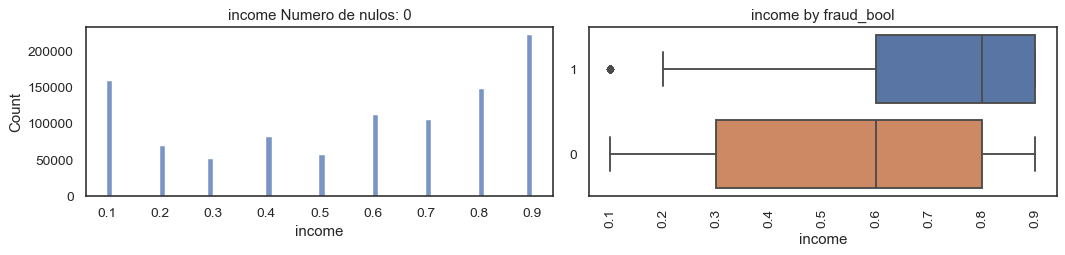

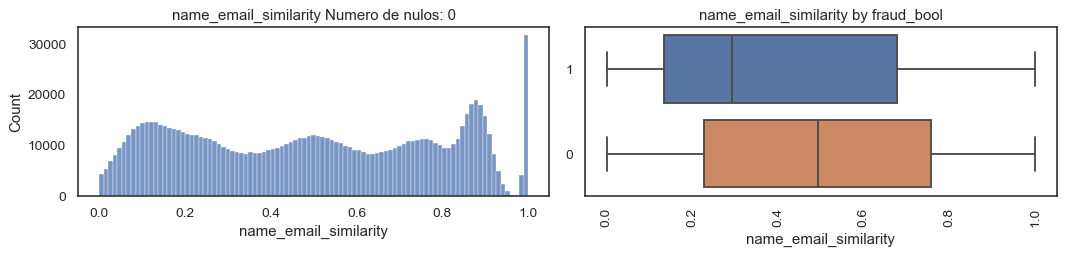

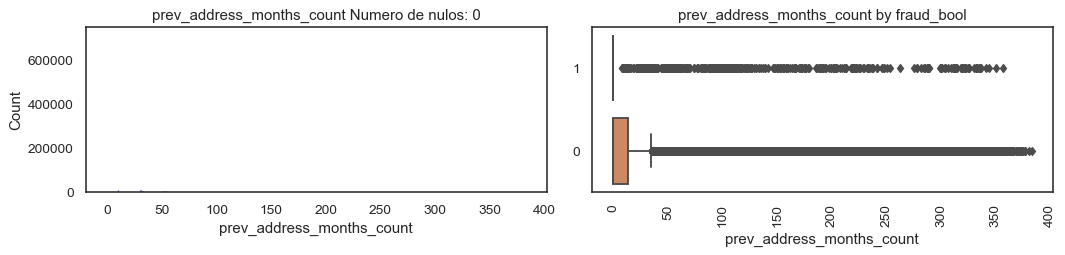

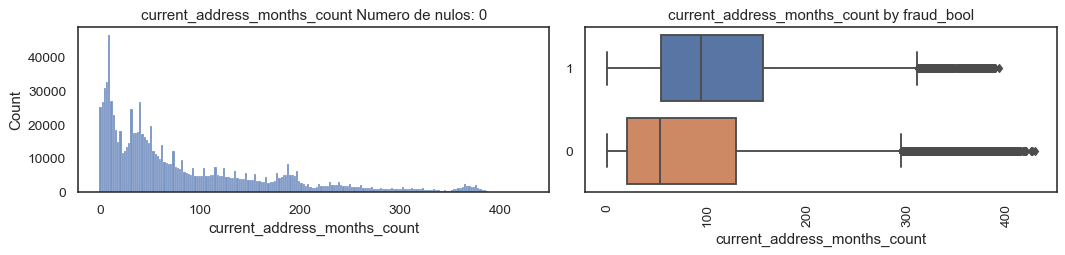

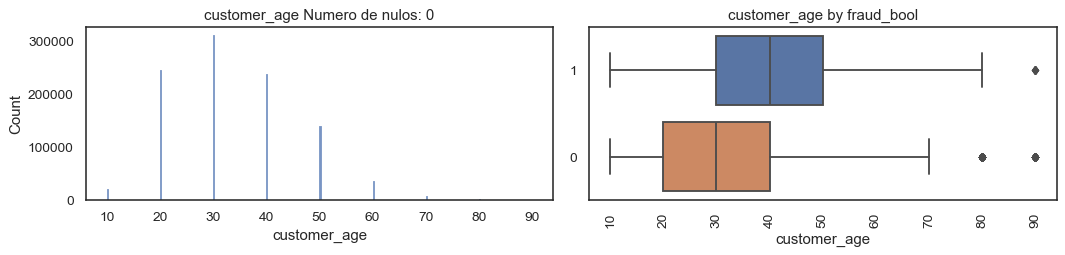

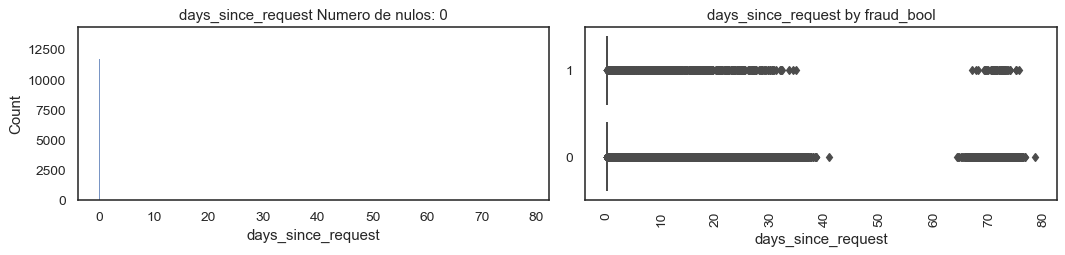

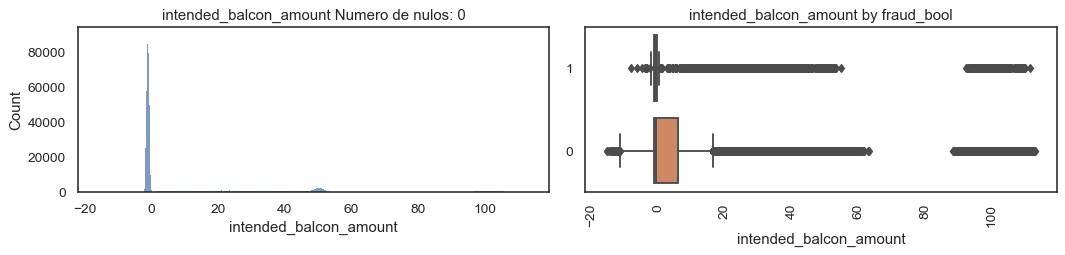

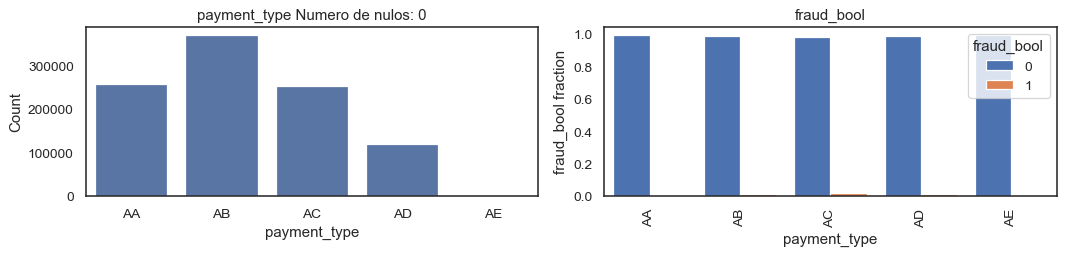

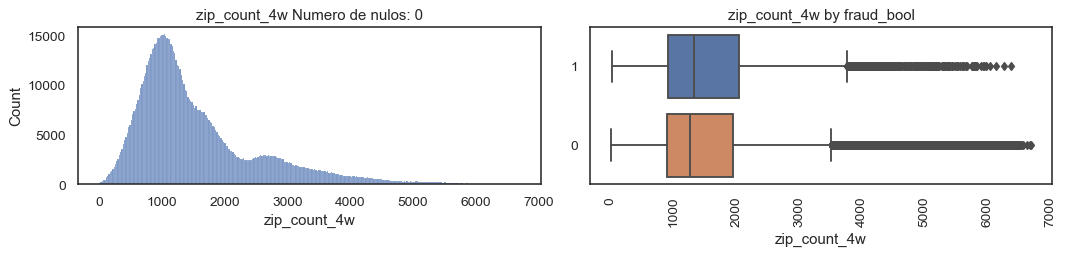

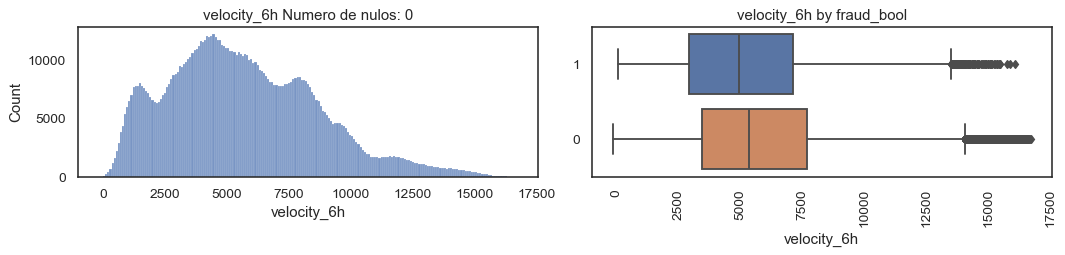

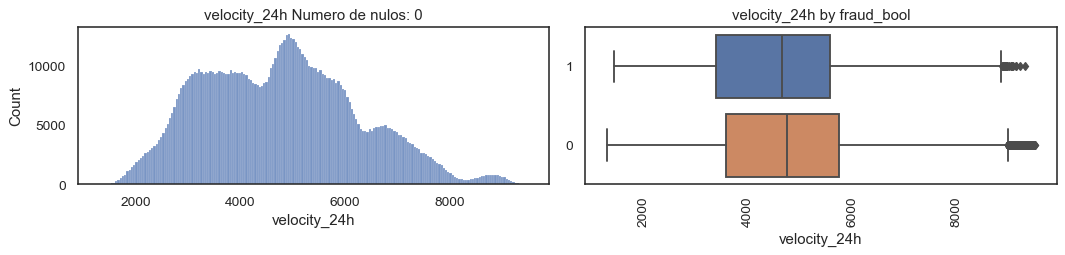

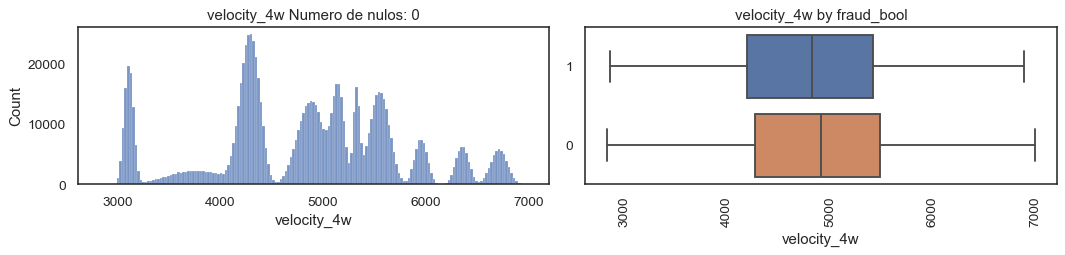

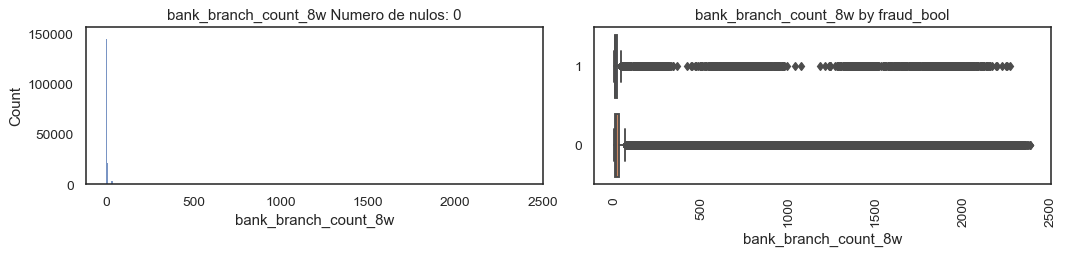

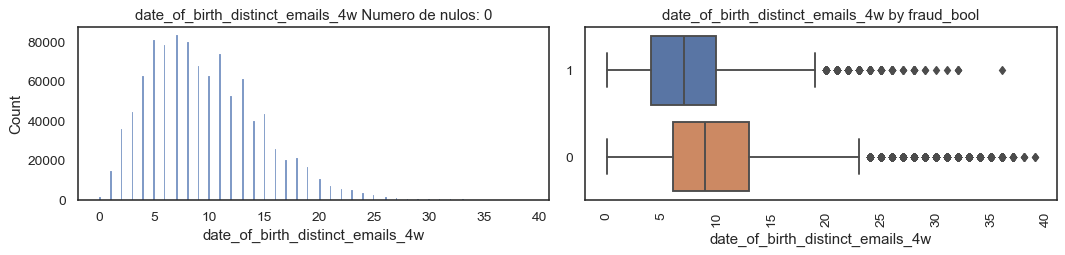

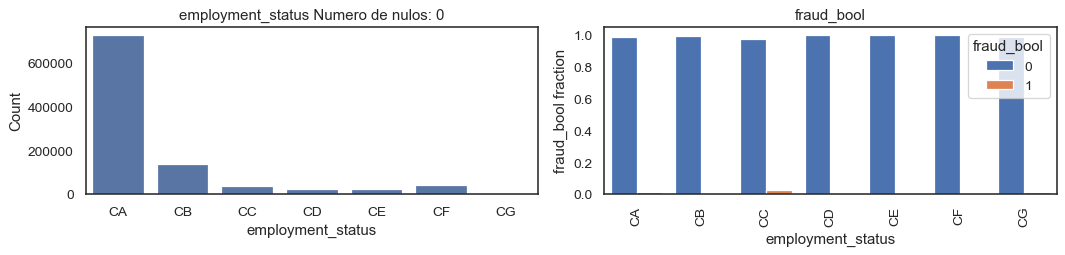

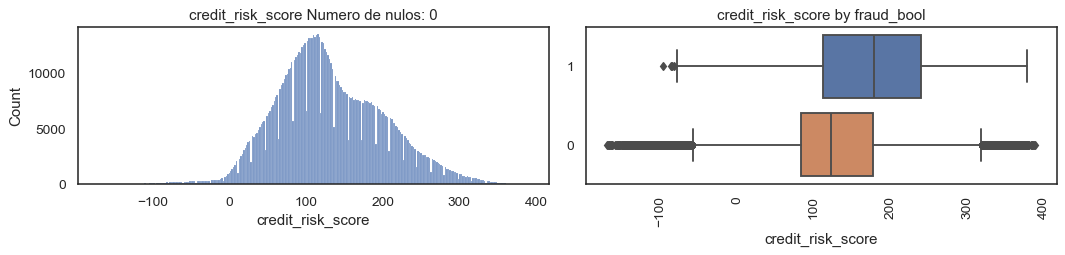

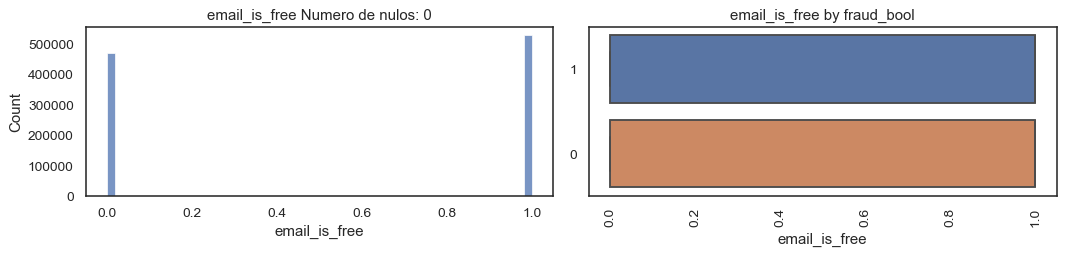

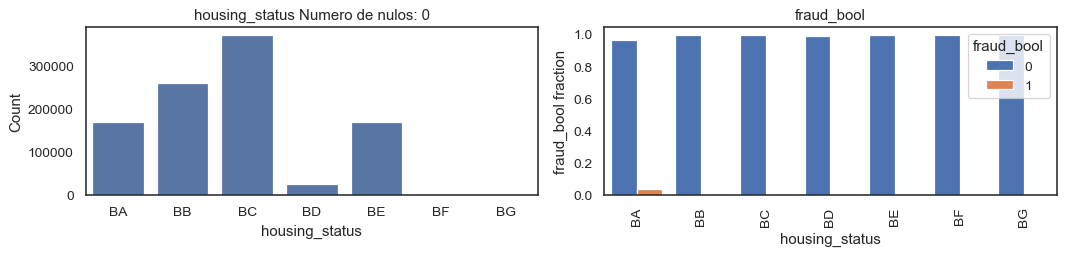

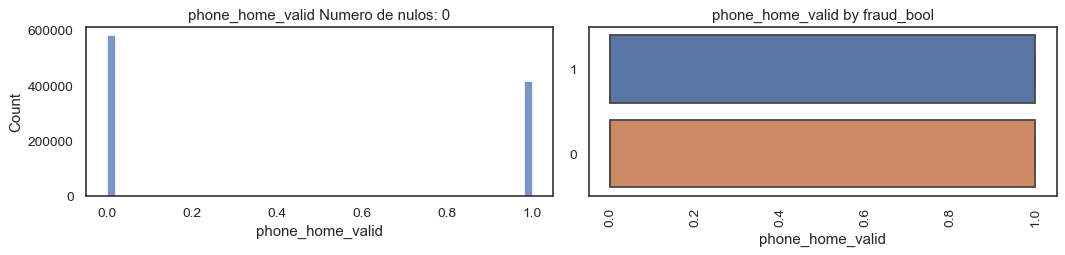

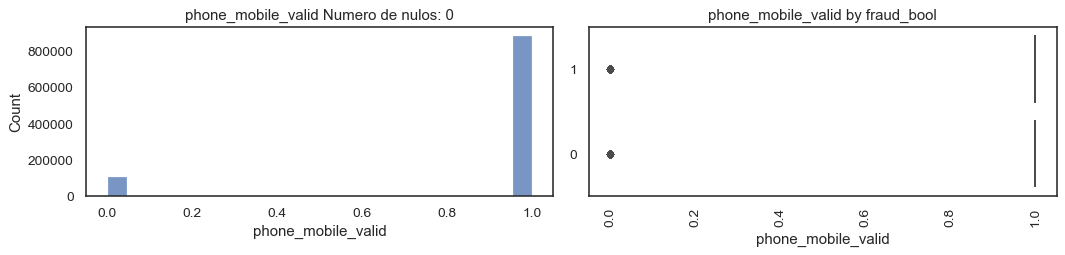

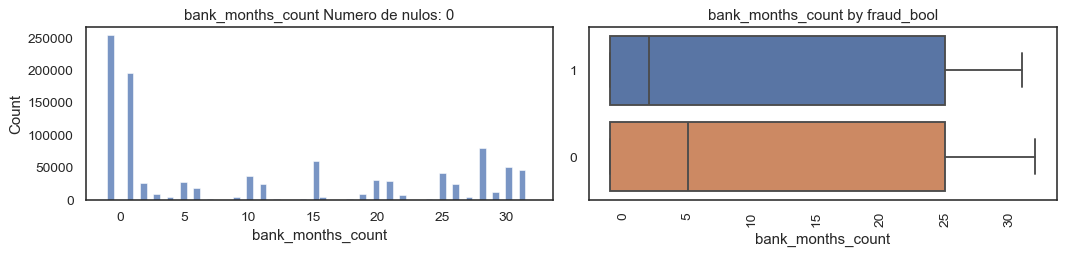

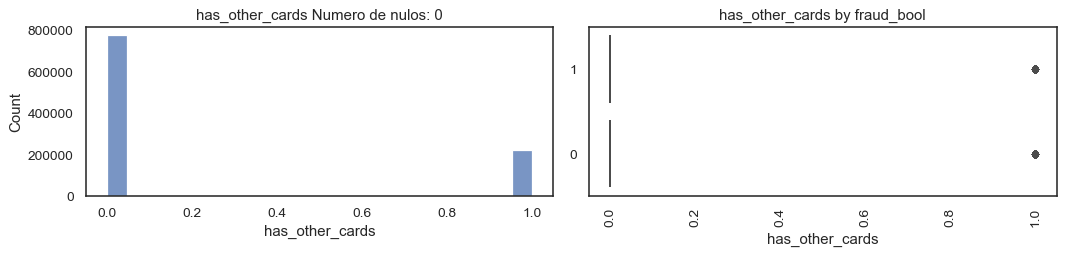

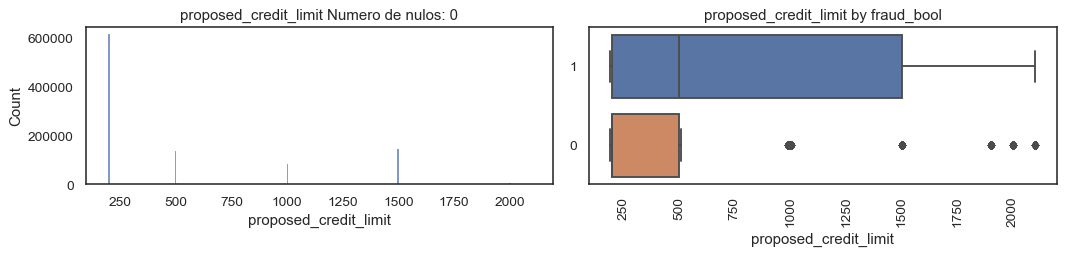

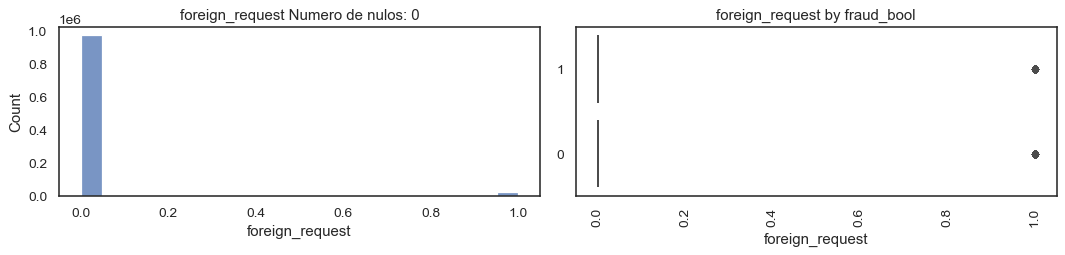

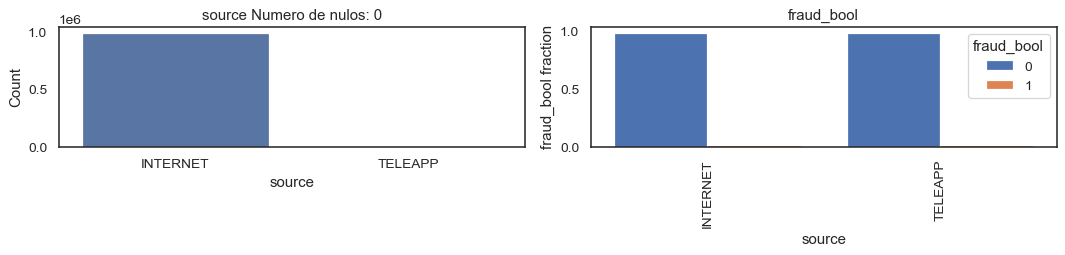

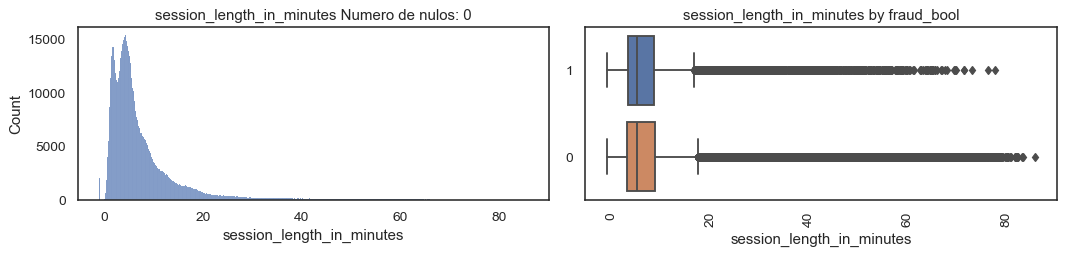

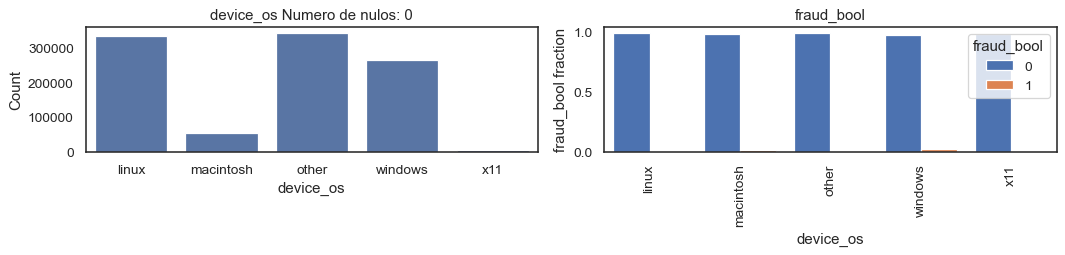

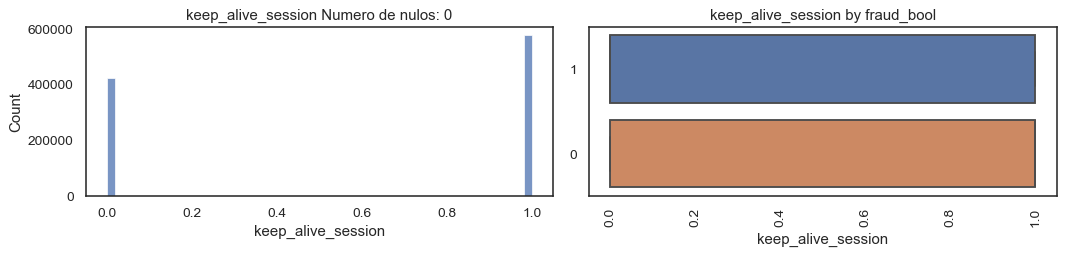

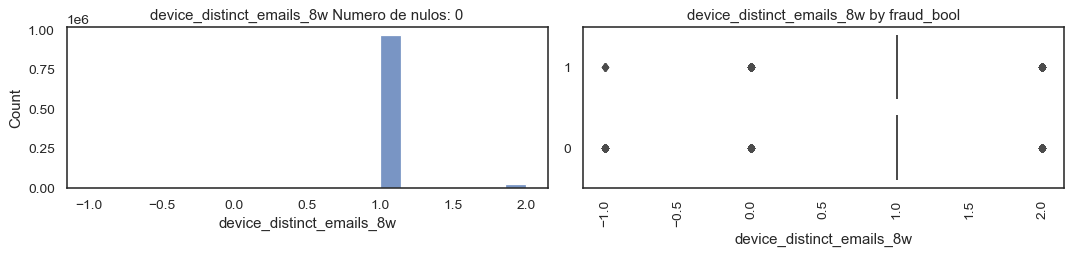

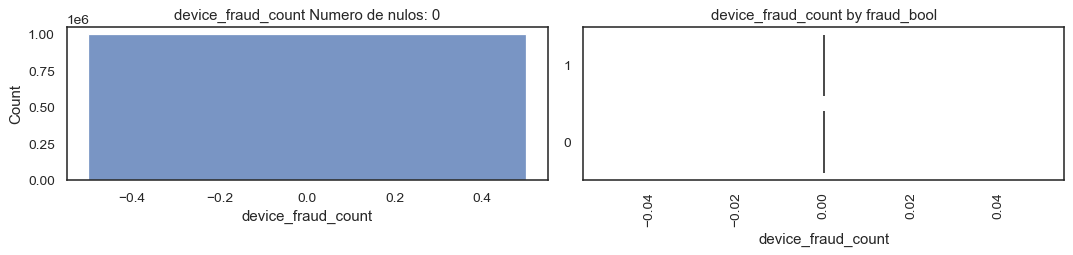

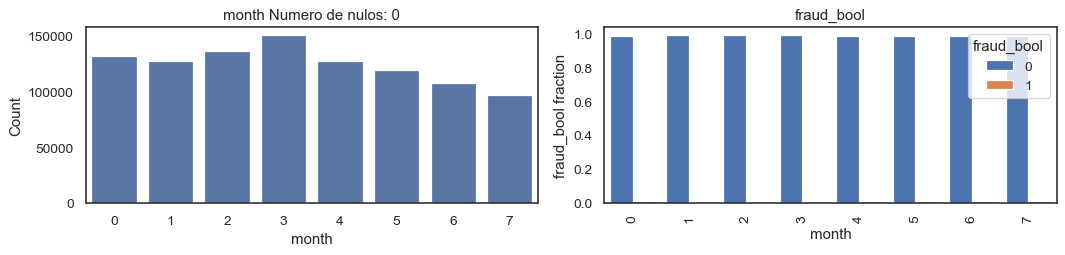

In [120]:
%%time
for i in list(Base_df.columns):
    if (Base_df[i].dtype==float) & (i!='fraud_bool'):
        plot_feature(Base_df, col_name=i, isContinuous=True, target='fraud_bool')
    elif  i!='fraud_bool':
        plot_feature(Base_df, col_name=i, isContinuous=False, target='fraud_bool')

En los gráficos anteriores observamos la relación entre las variables categóricas y númericas de cara a nuestra variable target que es fraud_bool y la cantidad de nulos. Los nulos de nuestro dataset son representados por números negativos y hemos decidido dejarlos en nuestro dataset teniéndolos en cuenta a la hora de interpretar resultados y gráficos. 

Las variables categóricas tienen como segundo gráfico un gráfico de barras para ilustrar su relación con el target y las variables numéricas tienen un boxplot que ilustra la distrubución de la variable ante aplicaciones fraudulentas representadas por el color naranja y las no fraudulentas (legítimas) representadas por el color azul. A continuación estaremos interpretando la relación entre las variables frente al target:

1. Income: en esta variable podemos observar que la distrubución y la media de ingresos en las aplicaciones fraudulentas es más alta que en las aplicaciones legítimas. Esto puede indicar que en las aplicaciones fraudulentas se tiende a poner ingresos anuales más altos que en las legítimas para intentar conseguir una aprobación de crédito más alta.

2. name_email_similarity: esta variable explora la similitus entre el nombre del aplicante y su dirección de correo electrónico. En el gráfico de boxplot podemos ver que lo típico de las aplicaciones fraudulentas es que la dirección de correo no se parezca al nombre del aplicante. Entre otras razones puede deberse a que las aplicaciones fraudulentas sean generadas al azar y que ninguno de los detalles en ellas sea legítimo, en especial el nombre y correo electrónico del aplicante.

3. prev_address_months_count: esta variable indica la cantidad de meses que el aplicante residió en su dirección anterior. Es una variable sin una distribución distinguible porque muchas instancias tienen valores nulos. En relación a las aplicaciones legítimas podemos observar que hay mayor dispersión cerca de los primeros 10 meses, en las aplicaciones fraudulentas no hay suficientes valores para ilustrar una dispersión. Esto quiere decir que en su mayoría las instancias con aplicaciones fraudulentas no incluyen esta información.

4. current_address_months_count: en esta variable se indica la cantidad de meses que una persona ha vivido en su actual residencia. Podemos observar una dispersión similar entre las instancias de aplicaciones legítimas y fraudulentas pero la media en las aplicaciones fraudulentas es mayor que en las legítimas. Esto indica que en las aplicaciones fraudulentas podemos encontrar que ponen más tiempo viviendo en su residencia actual para presentarse como un candidato deseable para recibir un producto de crédito del banco.

5. customer_age: en esta variable podemos ver la edad del aplicante redondeada a la década más cercana. En el gráfico de barras podemos observar que las aplicaciones fraudulentas aumentan en frecuencia según aumentan las edades de los aplicantes. De esto podemos deducir que en las aplicaciones fraudulentas ponen edades que pertenecen a la población adulta mayor y de la tercera edad para no despertar sospechas en sus aplicaciones.

6. days_since_request: en esta variable se almacenan la cantidad de días que han pasado desde que se hizo la solicitud de crédito. Podemos ver en el gráfico de box plot que las aplicaciones fraudulentas tienden a ser contestadas más rápido que las legítimas, pensamos que puede ser porque se identifican como fraudulentas y se descartan más rápido.

7. intended_balcon_amount: en esta variable

8. payment_type: en esta variable hay 5 tipos de planes de pago de crédito anonimizados. Hay muy poca diferencia entre la cantidad de aplicaciones fraudulentas pero dónde más podemos encontrar es en el tipo de pago AC.

9. zip_count_4w: en esta variable podemos ver la cantidad de aplicantes registrados en el mismo código postal en las últimas cuatro semanas. La dispersión y media dentre las aplicaciones legítimas y fraudulentas registradas en el mismo código postal es similar pero podemos ver que la media de las aplicaciones fraudulentas es mayor lo que nos lleva a deducir que hay mayor repetición de códigos postales en las aplicaciones fraudulentas.

10. velocity_6h, velocity_24h, velocity_4w: en estas variables podemos ver la cantidad de aplicaciones por hora hechas en las últimas 6 horas, 24 horas y 4 semanas. La dispersión entre las aplicaciones legítimas y fraudulentas es similar en estas tres variables pero la media de aplicaciones legítimas es mayor. Estos resultados tienen sentido destro de nuestro dataset ya que hay una mayor cantidad de instancias que son aplicaciones legítimas.

12. bank_branch_count_8w: en esta variable podemos ver la cantidad total de aplicaciones en la sucursal bancaria en las últimas 8 semanas. La dispersión y media entre la cantidad de en las aplicaciones fraudulentas. Para las aplicaciones fraudulentas no hay suficientes valores para ilustrar una dispersión. Esto quiere decir que en su mayoría las instancias con aplicaciones fraudulentas no incluyen esta información.
13. date_of_birth_distinct_emails_4w: En esta variable vemos la cantidad de emails para aplicantes con la misma fecha de nacimiento en las últimas cuatro semanas. En el gráfico de barras podemos ver que la cantidad de aplicaciones fraudulentas que tienen la misma fecha de nacimiento son muy pocas, con la mayor cantidad concentrada en 0. Esto indica que hay pocas repeticiones en las fechas de nacimiento en las aplicaciones fraudulentas. 
14. employment_status: esta variable esta compuesta de 7 variables anonimizadas de indican el estatus de empleo del aplicante. Según podemos ver en el gráfico de barras el valor más repetido en las aplicaciones fraudulentas es CC, lo que nos lleva a pensar que esta variable puede ser un estatus que se considera favorable para la otorgación de crédito por parte de los clientes que someten aplicaciones fraudulentas.
15. credit_risk_score: esta variable es un rango que indica el nivel de riesgo de la aplicación. Podemos obsservar una menor dispersión en las aplicaciones legítimas que en las fraudulentas, lo que nos lleva a pensar que el nivel de riesgo asignado es un valor confiable. Esto se confirma observando la dispersión y media de las aplicaciones fraudulentas, podemos observar que a estas aplicaciones se les asigna un nivel más alto de riesgo.
16. email_is_free: esta variable indica a través de un binario si el dominio del cual origina el correo electrónico es gratis o de pago. Podemos ver que no hay una diferencia significativa entre las aplicaciones fraudulentas dentro del binario de esta variable, esto indica que no hay una predisposición en esta variable entre las instancias.
17. housing_status: dentro de esta variable podemos ver que la distribución de instancias con aplicaciones fraudulentas esta bien distribuída entre los 7 posibles valores. El valor con mayor cantidad de aplicaciones fraudulentas es BA pero no es suficiente para sugerir que esta variable acapara la mayor parte de aplicaciones fraudulentas.
18. phone_home_valid, phone_mobile_valid: en estas variables podemos ver que no hay diferencia significativa en la presencia de fraude en números móvil o teléfono que sean válidos. 
19. bank_months_count: en esta variable podemos observar que las cuentas de 17 meses son las que más presencia de aplicaciones fraudulentas tienen.
20. has_other_cards: en esta variable podemos ver que en el binario que indica si la persona tiene otras tarjetas con el banco que recibe la aplicación puede ser un factor a tomar en cuenta al determinar si la aplicación es fraudulenta. No hay una diferencia significativa en el binario pero podemos ver que las instancias de fraude que son graficadas pertenecen a la categoría de personas que no tienen otras tarjetas con la entidad bancaria que recibe la aplicación.
21. proposed_credit_limit: podemos ver en los gráficos que las aplicaciones legítimas tienen menos dispersión y menor media que las aplicaciones fraudulentas. Esto nos deja saber que una aplicación fraudulenta puede pedir cualquier límite crediticio pero que por su media se deben monitorear las aplicaciones que pidan límites que superen la norma porque este factor junto con otros puede ayudar a identificar fraude.
22. foreign_request: en esta variable podemos ver que no existe una diferencia significativa en las instancias de fraude entre las aplicaciones domésticas o extranjeras pero podemos ver que hay más fraude acumulado en las aplicaciones extranjeras. La procedencia de la aplicación no es suficiente para determinar si es fraudulenta o no pero es un factor a condiderar.
23. source: en este gráfico podemos ver que a simple vista las instancias de aplicaciones fraudulentas son las mismas entre las aplicaciones que proceden de la web y de la aplicaión móvil del banco. Esta variable no es de gran utilidad para identificar la posibilidad de fraude.
24. session_length_in_minutes: viendo que la dispersión y la media del largo de la sesión activa en las aplicaciones legítimas y fraudulentas es igual concluimos que esta variable no es útil en la identificación de una posible aplicación fraudulenta.
25. device_os: en esta variable podemos ver que el sistema operativo del dispositivo del cual origina la aplicación no tiene una significancia notable para identificar fraude. Todos los sistemas tienen una acumulación de fraude similar pero destaca el sistema operativo Windows con la mayor acumulación. Habría que observar más de cerca las aplicaciones que procedan de dispositivos con sistema operativo Windows, entre otras características.
26.  keep_alive_session: en esta variable vemos que la acumulación de aplicaciones fraudulentas es similar entre los aplicantes que mantienen su sesión activa y los que no, pero hay más instancias de fraude entre los que deciden no mantener la sesión activa.
27.  device_distinct_emails: en este gráfico podemos ver que los dispositivos desde los que originan aplicaciones con más de una dirección de correo electrónico acumulan la mayor cantidad de aplicaciones fraudulentas. Estaría bien mirar estas aplicaciones más de cerca ya que pueden ayudar a detectar posibles casos de fraude.
28.  device_fraud_count: en esta variable podemos ver la cantidad de aplicaciones fraudulentas sometidas con el mismo dispositivo, pero solo tenemos valores de 0 indicando que no se recibe más de una aplicación fraudulenta desde un solo dispositivo. Esto pudiera ser porque bloquean al dispositivo de someter aplicaciones una vez se haya sometido una con fraude.
29.  month: en esta variable podemos ver que la distrubición de las aplicaciones fraudulentas es muy similar en los meses representados en el dataset y ninguno destaca especialmente. El mes en el que se hace la aplicación no es una variable que nos ayude a determinar instancias de fraude.

### VARIABLES NUMÉRICAS: outliers y correlaciones

Con la siguiente función se calcula la desviación de la media en las variables numéricas, teniendo en cuenta
la función objetivo. A través del multiplicador se detectan los outliers en la columna sum_outlier_values. En este caso, vemos como la variable "bank_branch_count_8w" es la que más valores outlier presenta, con el valor más alto: 32.723

In [121]:
def get_deviation_of_mean_perc(Base_df, list_var_continuous, target, multiplier):
    """
    Devuelve el porcentaje de valores que exceden del intervalo de confianza
    :type series:
    :param multiplier:
    :return:
    """
    pd_final = pd.DataFrame()
    
    for i in list_var_continuous:
        
        series_mean = Base_df[i].mean()
        series_std = Base_df[i].std()
        std_amp = multiplier * series_std
        left = series_mean - std_amp
        right = series_mean + std_amp
        size_s = Base_df[i].size
        
        perc_goods = Base_df[i][(Base_df[i] >= left) & (Base_df[i] <= right)].size/size_s
        perc_excess = Base_df[i][(Base_df[i] < left) | (Base_df[i] > right)].size/size_s
        
        if perc_excess>0:    
            pd_concat_percent = pd.DataFrame(Base_df[target][(Base_df[i] < left) | (Base_df[i] > right)]\
                                            .value_counts(normalize=True).reset_index()).T
            pd_concat_percent.columns = [pd_concat_percent.iloc[0,0], 
                                         pd_concat_percent.iloc[0,1]]
            pd_concat_percent = pd_concat_percent.drop('fraud_bool',axis=0)
            pd_concat_percent['variable'] = i
            pd_concat_percent['sum_outlier_values'] = Base_df[i][(Base_df[i] < left) | (Base_df[i] > right)].size
            pd_concat_percent['porcentaje_sum_null_values'] = perc_excess
            pd_final = pd.concat([pd_final, pd_concat_percent], axis=0).reset_index(drop=True)
            
    if pd_final.empty:
        print('No existen variables con valores nulos')
        
    return pd_final


In [122]:
get_deviation_of_mean_perc(Base_df, lista_variables_numericas, target='fraud_bool', multiplier=3)

0         1                          variable  sum_outlier_values  \
0   0.993836  0.006164         prev_address_months_count               25310   
1   0.984034  0.015966      current_address_months_count               21483   
2   0.958048  0.041952                      customer_age                7890   
3   0.988242  0.011758                days_since_request               17775   
4   0.990295  0.009705            intended_balcon_amount               18960   
5   0.990644  0.009356                      zip_count_4w               16247   
6    0.99355   0.00645                       velocity_6h                4341   
7   0.996289  0.003711                      velocity_24h                 539   
8   0.989654  0.010346              bank_branch_count_8w               40984   
9   0.993608  0.006392  date_of_birth_distinct_emails_4w                6258   
10  0.967445  0.032555                 credit_risk_score                3471   
11  0.870349  0.129651             proposed_credit_limit                6155   
12  0.979952  0.020048         session_length_in_minutes               23593   
13  0.962734  0.037266         device_distinct_emails_8w               31933   

    porcentaje_sum_null_values  
0                     0.025310  
1                     0.021483  
2                     0.007890  
3                     0.017775  
4                     0.018960  
5                     0.016247  
6                     0.004341  
7                     0.000539  
8                     0.040984  
9                     0.006258  
10                    0.003471  
11                    0.006155  
12                    0.023593  
13                    0.031933

En la tabla anterior podemos localizar valores outlier, que no vamos a tratar por el momento.

### ANÁLISIS DE CORRELACIONES (Variables numéricas)

In [123]:
def get_corr_matrix(dataset = None, metodo='pearson', size_figure=[10,8]):
    # Para obtener la correlación de Spearman, sólo cambiar el metodo por 'spearman'

    if dataset is None:
        print(u'\nHace falta pasar argumentos a la función')
        return 1
    sns.set(style="white")
    # Compute the correlation matrix
    corr = dataset.corr(method=metodo) 
    # Set self-correlation to zero to avoid distraction
    for i in range(corr.shape[0]):
        corr.iloc[i, i] = 0
    # Set up the matplotlib figure
    f, ax = plt.subplots(figsize=size_figure)
    # Draw the heatmap with the mask and correct aspect ratio
    sns.heatmap(corr, center=0,
                square=True, linewidths=.5,  cmap ='viridis' ) #cbar_kws={"shrink": .5}
    plt.show()
    
    return 0

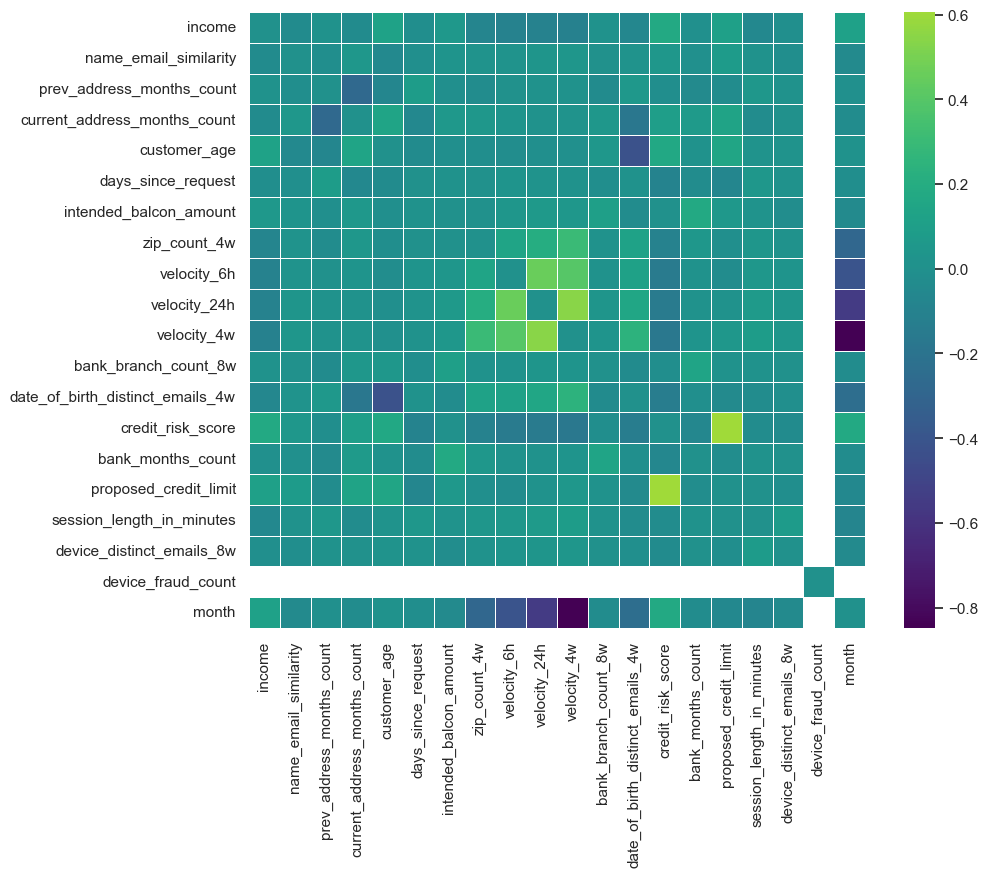

In [124]:
corr_matrix =get_corr_matrix(dataset = Base_df[lista_variables_numericas], 
                metodo='pearson', size_figure=[10,8])

Se aprecia una fuerte correlación entre "velocity_6h" y "velocity_24h" con la variable "Month". La relación que estas variables pueden tener entre sí podría estar relacionada con la estacionalidad o el comportamiento a lo largo del tiempo. Podría analizarse si la velocidad de las solicitudes (velocity) en las últimas 24 horas y en las últimas 4 semanas varía según el mes en el que se realizaron las aplicaciones y veríamos como influye una variable sobre la otra.

También vemos relación entre "customer_age" y "date_of_birth_distinct_emails_4w". Si hay un alto valor en "date_of_birth_distinct_emails_4w" para solicitantes con la misma fecha de nacimiento, esto podría indicar que las personas que comparten cumpleaños reciben más correos electrónicos en las últimas 4 semanas.

A continuación, vamos a analizar aquellas variables que tienen una correlación mínima del 50%, para detectar aquellas con mayor relación

In [125]:
corr = Base_df[lista_variables_numericas].corr('pearson')
new_corr = corr.abs()
new_corr.loc[:,:] = np.tril(new_corr, k=-1) 
new_corr = new_corr.stack().to_frame('correlation').reset_index().sort_values(by='correlation', ascending=False)
new_corr[new_corr['correlation']>0.5]

level_0            level_1  correlation
372                  month        velocity_4w     0.848100
313  proposed_credit_limit  credit_risk_score     0.606141
371                  month       velocity_24h     0.549919
209            velocity_4w       velocity_24h     0.539115

### ANÁLISIS DE CORRELACIONES: Variables categóricas. 

Ya tenemos una lista con todas las variables categóricas del dataset. Realizaremos el coeficiente de Cramer con cada una de ellas para estudiar si hay relación entre las mismas y la variable objetivo ('fraud_bool')

In [126]:
variables_categoricas

['payment_type',
 'employment_status',
 'housing_status',
 'email_is_free',
 'phone_home_valid',
 'phone_mobile_valid',
 'has_other_cards',
 'foreign_request',
 'source',
 'device_os',
 'keep_alive_session',
 'fraud_bool']

In [134]:
def cramers_v(confusion_matrix):
    """ 
    calculate Cramers V statistic for categorial-categorial association.
    uses correction from Bergsma and Wicher,
    Journal of the Korean Statistical Society 42 (2013): 323-328
    
    confusion_matrix: tabla creada con pd.crosstab()
    
    """
    chi2 = chi2_contingency(confusion_matrix)[0]
    n = confusion_matrix.sum()
    phi2 = chi2 / n
    r, k = confusion_matrix.shape
    phi2corr = max(0, phi2 - ((k-1)*(r-1))/(n-1))
    rcorr = r - ((r-1)**2)/(n-1)
    kcorr = k - ((k-1)**2)/(n-1)
    return np.sqrt(phi2corr / min((kcorr-1), (rcorr-1)))

In [135]:
confusion_matrix = pd.crosstab(Base_df["fraud_bool"], Base_df["payment_type"])
print(confusion_matrix)
cramers_v(confusion_matrix.values)

payment_type      AA      AB      AC      AD   AE
fraud_bool                                       
0             256885  366385  247862  117551  288
1               1364    4169    4209    1286    1


0.039042842242482736

Según el coeficiente de Crammer la asociación entre estas dos variables es débil. Esto sugiere que el tipo de pago no es un buen predictor que indique si se cometerá fraude en una transacción.

In [136]:
confusion_matrix = pd.crosstab(Base_df["fraud_bool"], Base_df["employment_status"])
print(confusion_matrix)
cramers_v(confusion_matrix.values)

employment_status      CA      CB     CC     CD     CE     CF   CG
fraud_bool                                                        
0                  721353  137335  36826  26422  22640  43949  446
1                    8899     953    932    100     53     85    7


0.039579041948826

La relación entre estas dos variables también esta considerada como débil según el coeficiente de Crammer. Esto indica que pueden haber mejores variables para predecir fraude o que la predicción de fraude puede ser más certera si se toman en cuenta otras variables a la vez que el estatus de empleo. 

In [137]:
confusion_matrix = pd.crosstab(Base_df["fraud_bool"], Base_df["housing_status"])
print(confusion_matrix)
cramers_v(confusion_matrix.values)

housing_status      BA      BB      BC     BD      BE    BF   BG
fraud_bool                                                      
0               163318  259397  369855  25935  168553  1662  251
1                 6357    1568    2288    226     582     7    1


0.11487732983320799

El Coeficiente de Crammer entre estas dos variables indica que hay un asociación moderada entre ambas variables. Esto quiere decir que la variable "housing status" puede tener poder predictivo para determinar si una transacción es fraudulenta o no. 

In [138]:
confusion_matrix = pd.crosstab(Base_df["fraud_bool"], Base_df["email_is_free"])
print(confusion_matrix)
cramers_v(confusion_matrix.values)

email_is_free     0.0     1.0
fraud_bool                   
0              466376  522595
1                3738    7291


0.027730004919501703

El coeficiente de crammer indica que hay poca relación entre estas variables, la variable ëmail_is_free" no es un buen factor predictivo de fraude.

In [139]:
confusion_matrix = pd.crosstab(Base_df["fraud_bool"], Base_df["phone_home_valid"])
print(confusion_matrix)
cramers_v(confusion_matrix.values)

phone_home_valid     0.0     1.0
fraud_bool                      
0                 574685  414286
1                   8238    2791


0.03510388236282846

La relación de estas variables es débil según el coeficiente de Crammer. Esto indica que la validez de un número de teléfono no es suficiente para predecir si se cometerá fraude.

In [140]:
confusion_matrix = pd.crosstab(Base_df["fraud_bool"], Base_df["phone_mobile_valid"])
print(confusion_matrix)
cramers_v(confusion_matrix.values)

phone_mobile_valid     0.0     1.0
fraud_bool                        
0                   108676  880295
1                     1648    9381


0.013126368094879885

La relación de estas variables es débil según el coeficiente de Crammer. Esto indica que la validez de un número de móvil no es suficiente para predecir si se cometerá fraude.

In [141]:
confusion_matrix = pd.crosstab(Base_df["fraud_bool"], Base_df["has_other_cards"])
print(confusion_matrix)
cramers_v(confusion_matrix.values)

has_other_cards     0.0     1.0
fraud_bool                     
0                766914  222057
1                 10098     931


0.03513065449791526

La relación de estas variables es débil según el coeficiente de Crammer. Esto indica que el hecho de que una persona tenga otras tarjetas de crédito no es suficiente para predecir si se cometerá fraude.

In [142]:
confusion_matrix = pd.crosstab(Base_df["fraud_bool"], Base_df["foreign_request"])
print(confusion_matrix)
cramers_v(confusion_matrix.values)

foreign_request     0.0    1.0
fraud_bool                    
0                964284  24687
1                 10474    555


0.016824420425245186

La relación de estas variables es débil según el coeficiente de Crammer. Esto indica que no es suficiente si las transacciones ocurren en un país diferente al país del banco para predecir si se cometerá fraude.

In [143]:
confusion_matrix = pd.crosstab(Base_df["fraud_bool"], Base_df["source"])
print(confusion_matrix)
cramers_v(confusion_matrix.values)

source      INTERNET  TELEAPP
fraud_bool                   
0             982035     6936
1              10917      112


0.00373333855293764

La relación de estas variables es débil según el coeficiente de Crammer. Esto indica que el origen de la aplicación (App o página web) no es suficiente para predecir si se cometerá fraude.

In [144]:
confusion_matrix = pd.crosstab(Base_df["fraud_bool"], Base_df["device_os"])
print(confusion_matrix)
cramers_v(confusion_matrix.values)

device_os    linux  macintosh   other  windows   x11
fraud_bool                                          
0           330997      53074  340754   256999  7147
1             1715        752    1974     6507    81


0.08046708891771352

El Coeficiente de Crammer entre estas dos variables indica que hay un asociación moderada entre ambas variables. Esto quiere decir que el sistema operativo en el dispositivo electrnico del que origina la solicitud  puede tener poder predictivo para determinar si una transacción es fraudulenta o no siendo el sistema operativo de Windows desde el que se comete mas fraude en este dataset.

In [145]:
confusion_matrix = pd.crosstab(Base_df["fraud_bool"], Base_df["keep_alive_session"])
print(confusion_matrix)
cramers_v(confusion_matrix.values)

keep_alive_session     0.0     1.0
fraud_bool                        
0                   415792  573179
1                     7261    3768


0.05027680351314226

La relación de estas variables es débil según el coeficiente de Crammer. Esto indica que si el cliente desea mantener la sesión activa sin cerrar o no, no es suficiente para predecir si se cometerá fraude.

En general, podemos ver que la correlación entre la variables es prácticamente nula. Aquella variable con mayor relación con la existencia o no de fraude (variable objetivo), es "housing_status", con un resultado de 0,115. Por otro lado, la variable con menor relación es "source", con un valor de 0,005.

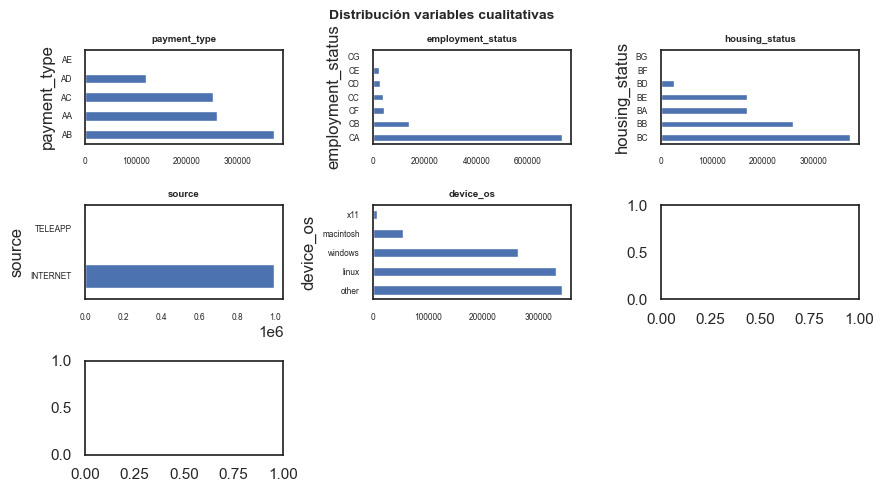

In [146]:
fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(9, 5))
axes = axes.flat
columnas_object = Base_df.select_dtypes(include=['category']).columns

for i, colum in enumerate(columnas_object):
    Base_df[colum].value_counts().plot.barh(ax = axes[i])
    axes[i].set_title(colum, fontsize = 7, fontweight = "bold")
    axes[i].tick_params(labelsize = 6)
    axes[i].set_xlabel("")

# Se eliminan los axes vacíos
for i in [7, 8]:
    fig.delaxes(axes[i])
    
fig.tight_layout()
plt.subplots_adjust(top=0.9)
fig.suptitle('Distribución variables cualitativas',
             fontsize = 10, fontweight = "bold");

### Interpretación de la distribución de variables categóricas:

Vemos que el método de pago más usado es 'AB' y nadie emplea 'AE'.

El estado de empleo de casi la totalidad de individuos es 'CA'.

El estado de vivienda de la mayoría es 'BC' aunque también predomina 'BB'. 


La totalidad de personas acceden desde Internet y sobre todo dispositivos con sistema operativo linux, aunque hay también bastantes emplean windows o macintosh. La mayoría de ellos emplean otro sistema operativo distinto a los mencionados anteriormente.

### Tratamiento de valores nulos
En las variables categoricas, los valores nulos se suelen sustituir por una nueva clase: "sin valor" o por la moda. En este caso, no encontramos valores nulos en las variables categóricas (solo en las numéricas). Por tanto, no realizamos ningún cambio sobre ellas

### Guardado en csv de lo realizado hasta ahora

In [148]:
Base_df.to_csv("../data/base_data_EDA.csv")

### Conclusiones:


En este ejercicio pudimos explorar los datos del EDA dataset y prepararlos para usarlos como entrenamiento de un modelo predictivo de fraude en el futuro. Escogimos nuestra variable target y exploramos la correlación de esta con las otras variables dentro del dataset. La variable objetivo "fraud_bool"que identifica las aplicaciones de crédito bancarias fraudulentas con un 1 y las aplicaciones legítimas con un 0. 

En el caso de la detección de fraudes, es común observar una baja prevalencia de la clase fraudulenta (en este conjunto de datos, observamos aproximadamente un 1% de fraudes, pero puede llegar a ser menos del 0.1%). 

Hicimos un análisis en el que vimos la acumulación de fraude entre el resto de variables en el dataset para identificar variables significativas a la hora de identificar fraude. Entre las variables que identificamos como significativas en este ejercicio están "proposed_credit_limit", "bank_months_count", "credit_risk_score" e "income". 

Además, vimos el nivel de correlación de las variables categóricas ante nuestro target utilizando el coeficiente de Crammer. Las variables con mayor correlación a la variable target fueron "housing_status" y "device_os". 

- Valores missing: Por el momento, los hemos identificado y sabemos que predominan en la mayoría de columnas numéricas. Más adelante, decidiremos como tratarlos.

- Valores outliers: También hemos detectado valores extremos que más adelante los trataremos.

Esperamos que con este ejercicio exploratorio nuestros datos estén en condiciones óptimas para entrenar un modelo predictivo en el futuro. 